![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='top1'></a>
# <center>Desafio 1: Análisis exploratorio de un dataset de precios de propiedades

### Grupo 6:
- Fairhurst, Guillermo
- Castellari, Diego
- Ripoll, Rodrigo



## Indice
  
<a href='#section1'>**Step 1:**</a>   Importar el dataframe de Properatti    
<a href='#section2'>**Step 2:**</a>   Health Check   
<a href='#section3'>**Step 3:**</a>   Detección de Outliers  
<a href='#section4'>**Step 4:**</a>   Visualizaciones y Conclusiones finales


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section1'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h2>Step 1: Importamos el Dataframe de Properati y realizamos primeras observaciones:</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>


In [1]:
import os
import numpy as np
import pandas as pd
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('properatti.csv')

In [3]:
pd.set_option("display.max_columns", None)  # para poder ver todas las columnas
df.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [4]:
print('Columnas:                     Count:          dtype:')
print('-'*55)

df.info()

Columnas:                     Count:          dtype:
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section2'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h2>Step 2: Helth Check</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>

Realizamos un primer análisis exploratorio del dataset, buscamos ver que informacion es relevante y detectamos información faltante que pueda llegar a ser completada utilizando otros campos

## 2.1 Limpieza del Dataset
**Primeras observaciones:**  
<a href='#section2.1.1'>**2.1.1**</a> Para el presente ejercicio, las siguientes columnas pueden ser eliminadas:  
  - `Unnamed: 0`: repite la informacion del indice autogenerado por pandas   
  - `country`: se puede eliminar porque todas las propiedades son de Argentina.  
  - `geonames_id`: no encontramos relevancia sobre la columna ya que la informacion geografica faltante puede obtenerse de la columna `place_name`  
  - `lat-lon`: consolida a las columnas `lat` y `lon`. Consideramos de mayor utilidad dejar la información de latitud y longitud por separado por lo que se puede eliminar y asi evitar redundancia. Los datos faltantes de `lat` y `lon` pueden obtenerse de la columna `place_name` como se mencionó anteriormente.  
  - `properati_url`: carece de utilidad para el presente ejercicio  
  - `image_thumbnail` carece de utilidad para el presente ejercicio  
  
<a href='#section2.1.2'>**2.1.2**</a> las columnas `operation`, `property_type` y `currency` puede cambiarse el tipo de dato a "categorical" para optimizar el uso de memoria.  
<a href='#section2.1.3'>**2.1.3**</a> la columna `rooms` puede ser completada aplicando regex sobre las columnas `description` y `title`.  
<a href='#section2.1.4'>**2.1.4**</a> `place_with_parent_names` agrupa a las columnas `country`, `state_name` y `place_name` de esta primera se pueden completar los 23 campos faltantes de `place_name` que casualmente son "Tigre".   
<a href='#section2.1.5'>**2.1.5**</a> Completamos los campos de latitud y longitud faltantes.  
<a href='#section2.1.6'>**2.1.6**</a> trabajamos con las columnas de precios.  
<a href='#section2.1.7'>**2.1.7**</a> trabajamos con las columnas de superficie.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h3>2.1 Limpieza del Dataset</h3></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>


In [5]:
# guardamos 1 copia del original
df_orig = df.copy()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.1'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.1 Eliminamos las columnas innecesarias</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>


In [6]:
# la columna 'Unnamed: 0'es un indice es innecesaria, la eliminamos
# la columna 'country_name' no aporta valor por tratarse siempre de Argentina
# no encontramos utilidad en la información geonames_id, procedemos a eliminar
# la columna lat-lon repite la informacion de las columnas lat y lon.
# eliminamos tambien 'properati_url','image_thumbnail', 'floor' y 'expenses'

df = df.drop(['Unnamed: 0','country_name','geonames_id','lat-lon','properati_url','image_thumbnail', 'floor', 'expenses'], axis=1)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.2'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.2 Cambiar el tipo de datos a categorico cuando corresposonde</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>


La columna `operations` posee un unico valor: sell. Como la hoja de consigna indica que potencialmente puede tomar 2 posibles 
valores (sell/rent) no eliminamos la columna, pero la hacemos del tipo category.  
Hacemos lo mismo con las columnas `property_type` y `currency`.

In [7]:
df['operation'] = df['operation'].astype('category')
df['property_type'] = df['property_type'].astype('category')
df['currency'] = df['currency'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 18 columns):
operation                     121220 non-null category
property_type                 121220 non-null category
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
state_name                    121220 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null category
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
rooms                         47390 non-null float64
description                   1

__**nota:**__ se redujo el espacio en memorio del dataset en 8MB (33%) lo cual hara mas eficiente todas las operaciones a continuación 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.3'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.3 inferir valores faltantes del feature 'room'</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>
 


A continuación vamos a completar la informacion faltante de la columna `rooms` con la informacion que pueda obtenerse de las columnas `description` y `title`. Para ello vamos a utilizar la libreria ***re***  

Definmos una funcion `cant_amb()` que utilizaremos para obtener la cantidad de ambientes mencionadas en la columnas de `description` y `title`.

In [8]:
def cant_amb(text):
    ambRegex = re.compile(r'''
        (mono)     #intento matchear monoambiente
        \s?
        amb.?\w*
        |          # o
        (\d)       # cantidad de ambientes
        \s?        # espacio - puede estar o no -
        amb.?\w*   # segido por amb, amb. o ambiente
        ''', re.VERBOSE | re.IGNORECASE)
    try:
        mo = ambRegex.search(text)
        #print(mo.group(1))
        if mo.group(1) != None:
            return 1
        if mo.group(2) != None:
            return int(mo.group(2))
    except:
        return np.nan

In [9]:
# extraemos la cantidad de ambientes mencionados en las columnas descriptivas.
amb = df[['description','title']].applymap(lambda x: cant_amb(x))
amb.head()

,description,title
0,2.0,2.0
1,NaN,NaN
2,2.0,2.0
3,3.0,3.0
4,NaN,2.0


In [10]:
amb = pd.concat([amb, df['rooms']], axis=1)

#consolidamos la informacion extraida de las columnas descriptivas en una nueva variable amb_unif
amb['unif'] = amb.apply(lambda x: math.ceil(x.sum()/x.count()) if x.count() != 0 else np.nan,axis=1)

In [11]:
#consolidamos la informacion extraida de las columnas descriptivas en una nueva variable amb_unif
amb_unif = amb.apply(lambda x: x.sum()/x.count() if x.count() != 0 else np.nan,axis=1)

In [12]:
amb['unif'].count()

73291

Vemos que previamente a este ejercicio teníamos 52,004 campos con valores para la columna `room` y luego del ejercicio tenemos 73,291 (logramos recuperar un **40%** de datos adicionales a los datos originales sobre la columna room. 

In [13]:
df['rooms']= amb['unif']
df.loc[df.rooms.isnull(), 'rooms'] = df.loc[df.rooms.isnull(), 'rooms'].fillna(amb['unif'])

Vamos a utilizar las columnas `description` y `title` para recuperar datos de superficie, por lo cual aún no las eliminamos.

In [14]:
#df = df.drop(['description','title'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 18 columns):
operation                     121220 non-null category
property_type                 121220 non-null category
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
state_name                    121220 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null category
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
rooms                         73291 non-null float64
description                   1

Logramos compleatar 15,538 valores para la columna rooms (de 47,390 originales a 62,928), lo que representa un **33%** de datos recuperados.

In [16]:
df.isnull().sum()

operation                         0
property_type                     0
place_name                       23
place_with_parent_names           0
state_name                        0
lat                           51550
lon                           51550
price                         20410
currency                      20411
price_aprox_local_currency    20410
price_aprox_usd               20410
surface_total_in_m2           39328
surface_covered_in_m2         19907
price_usd_per_m2              52603
price_per_m2                  33562
rooms                         47929
description                       2
title                             0
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.4'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.4 Trabajamos sobre los features `place_with_parent_names` , `country`, `state_name` y `place_name`</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>
 

Observamos que `place_with_parent_names` agrupa a las columnas `country`, `state_name` y `place_name`. También vemos que la descripcion dentro de `place_with_parent_names` tiene hasta 4 niveles de detalle.  
Manipulamos la columna para quedarnos unicamente con los primeros 3 niveles.
Finalmente buscamos uniformizar los nombres de la provincia de Buenos Aires.

In [17]:
def geo_limit(text):
    address_list = text.split('|')
    pais = address_list[1]
    provincia = address_list[2]
    barrio = address_list[3]
    
    if len(barrio)==0: barrio = provincia 
    if 'bs.as' in provincia.lower(): provincia = 'Buenos Aires'
    if 'buenos aires' in provincia.lower(): provincia = 'Buenos Aires'
        

    return barrio.title()+", "+provincia.title()+", "+pais.title()    

In [18]:
#probamos la función
geo_limit('|Argentina|buenos aires|palermo|pepe|')

'Palermo, Buenos Aires, Argentina'

In [19]:
df['place_with_parent_names'] = df['place_with_parent_names'].apply(geo_limit)

In [20]:
df

,operation,property_type,place_name,place_with_parent_names,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
0,sell,PH,Mataderos,"Mataderos, Capital Federal, Argentina",Capital Federal,-34.661824,-58.508839,62000.0,USD,1093959.00,62000.00,55.0,40.0,1127.272727,1550.000000,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,"La Plata, Buenos Aires, Argentina",Bs.As. G.B.A. Zona Sur,-34.903883,-57.964330,150000.0,USD,2646675.00,150000.00,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,sell,apartment,Mataderos,"Mataderos, Capital Federal, Argentina",Capital Federal,-34.652262,-58.522982,72000.0,USD,1270404.00,72000.00,55.0,55.0,1309.090909,1309.090909,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,sell,PH,Liniers,"Liniers, Capital Federal, Argentina",Capital Federal,-34.647797,-58.516424,95000.0,USD,1676227.50,95000.00,NaN,NaN,NaN,NaN,3.0,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,sell,apartment,Centro,"Mar Del Plata, Buenos Aires, Argentina",Buenos Aires Costa Atlántica,-38.002626,-57.549447,64000.0,USD,1129248.00,64000.00,35.0,35.0,1828.571429,1828.571429,2.0,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...
5,sell,house,Gualeguaychú,"Gualeguaychú, Entre Ríos, Argentina",Entre Ríos,-33.014071,-58.519828,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ..."
6,sell,PH,Munro,"Vicente López, Buenos Aires, Argentina",Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,130000.0,USD,2293785.00,130000.00,106.0,78.0,1226.415094,1666.666667,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,..."
7,sell,apartment,Belgrano,"Belgrano, Capital Federal, Argentina",Capital Federal,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.00,45.0,40.0,3066.666667,3450.000000,1.0,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...
8,sell,apartment,Belgrano,"Belgrano, Capital Federal, Argentina",Capital Federal,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.00,65.0,60.0,3000.000000,3250.000000,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,..."
9,sell,house,Rosario,"Rosario, Santa Fe, Argentina",Santa Fe,-32.942031,-60.725919,460000.0,ARS,455201.45,25798.49,NaN,NaN,NaN,NaN,NaN,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO


A continuacion creamos una lista con todos los nombres de los barrios, que será utilizada en un futuro para:  
1) a fin de poder capturar sus correspondientes ubicaciones geograficas (lat y lon) y completar en las ocurrencias del dataset que faltasen.  
2) calcular los precios promedio del m2 por barrio.

In [21]:
lista_de_barrios = list(df['place_with_parent_names'].unique())
len(lista_de_barrios)

575

En este punto consideramos que no es necesario conservar la información de las columnas `state_name` y `place_name` ya que de ser necesarias a futuro se pueden recuperar de la columna `place_with_parent_names`

In [22]:
df = df.drop(['state_name','place_name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 16 columns):
operation                     121220 non-null category
property_type                 121220 non-null category
place_with_parent_names       121220 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null category
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
rooms                         73291 non-null float64
description                   121218 non-null object
title                         121220 non-null object
dtypes: category(3), float64(10

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.5'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.5 Completamos los datos de Lat y Lon faltantes</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>


A continuación vamos a completar la informacion de las columnas `lat` y `lon` con la informacion de `place_name`.  
Para ello vamos a utilizar la librerio ***geopy***  

El primer paso es crear un nuevo dataframe que tenga como indice los +500 barrios, y crear una funcion que para obtener los datos de Lat y Lon a partir de la api de geopy.

In [23]:
df_barrios = pd.DataFrame(df['place_with_parent_names'].unique(), columns=['Barrios'])
df_barrios.set_index('Barrios', inplace=True)
df_barrios.head(3)

""
Barrios
"Mataderos, Capital Federal, Argentina"
"La Plata, Buenos Aires, Argentina"
"Liniers, Capital Federal, Argentina"


2) a continuación instalamos la librería ***geopy*** y generamos 3 columnas nuevas:  
- `geopy`  
- `geopy_lat`  
- `geopy_lon`

In [24]:
#!pip install geopy

In [25]:
from geopy.geocoders import Nominatim  
nom = Nominatim(user_agent = "my-application")

# definimos una funcion que incorporte el try: / except:
def my_geocode(location):
    print('.',end='')
    try:
        return nom.geocode(location)
    except:
        return None

# probamos que la libreria este funcionando correctamente
#display(nom.geocode(',Argentina,Capital Federal,Mataderos,'))
#display(my_geocode("Pinamar, Buenos Aires, Argentina"))

In [26]:
df_barrios['geopy'] = [my_geocode(item) for item in df_barrios.index]

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [27]:
display(df_barrios.head(3))
display(df_barrios[df_barrios['geopy'].isnull()])
display(df_barrios.info())

,geopy
Barrios,
"Mataderos, Capital Federal, Argentina","(Mataderos, CABA, Argentina, (-34.6578631, -58..."
"La Plata, Buenos Aires, Argentina","(La Plata, Partido de La Plata, Bs. As., Argen..."
"Liniers, Capital Federal, Argentina","(Liniers, CABA, Argentina, (-34.642403, -58.52..."


,geopy
Barrios,
"Capital Federal, Capital Federal, Argentina",None
"San Fernando, Buenos Aires, Argentina",None
"Colón, Entre Ríos, Argentina",None
"Bs.As. G.B.A. Zona Sur, Buenos Aires, Argentina",None
"La Matanza, Buenos Aires, Argentina",None
"Lanús, Buenos Aires, Argentina",None
"Punilla, Córdoba, Argentina",None
"Lomas De Zamora, Buenos Aires, Argentina",None
"Necochea, Buenos Aires, Argentina",None


<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, Mataderos, Capital Federal, Argentina to Malabrigo, Santa Fe, Argentina
Data columns (total 1 columns):
geopy    556 non-null object
dtypes: object(1)
memory usage: 9.0+ KB


None

In [28]:
df_barrios['geopy_lat'] = df_barrios['geopy'].apply(lambda x: x.latitude if x != None else None)
df_barrios['geopy_lon'] = df_barrios['geopy'].apply(lambda x: x.longitude if x != None else None)

In [29]:
df_barrios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, Mataderos, Capital Federal, Argentina to Malabrigo, Santa Fe, Argentina
Data columns (total 3 columns):
geopy        556 non-null object
geopy_lat    556 non-null float64
geopy_lon    556 non-null float64
dtypes: float64(2), object(1)
memory usage: 18.0+ KB


Dado que generar este dataframe `df_barrios` conlleva un tiempo considerable ~30min, guardamos el mismo en formato ***CSV*** para poder cargarlo en futuras oportunidades.

In [30]:
df_barrios.iloc[:,1:].to_csv('barrios_geolocation.csv', index=True,encoding='utf-8')

Detectamos valores faltantes y:  
- buscamos completarlos una vez mas con la api de geopy (x si hubo timeouts)
- buscamos completarlos con nuestro dataframe de properatti
- carga manual via diccionario.

In [31]:
df_barrios[df_barrios['geopy'].isnull()] 

,geopy,geopy_lat,geopy_lon
Barrios,,,
"Capital Federal, Capital Federal, Argentina",None,NaN,NaN
"San Fernando, Buenos Aires, Argentina",None,NaN,NaN
"Colón, Entre Ríos, Argentina",None,NaN,NaN
"Bs.As. G.B.A. Zona Sur, Buenos Aires, Argentina",None,NaN,NaN
"La Matanza, Buenos Aires, Argentina",None,NaN,NaN
"Lanús, Buenos Aires, Argentina",None,NaN,NaN
"Punilla, Córdoba, Argentina",None,NaN,NaN
"Lomas De Zamora, Buenos Aires, Argentina",None,NaN,NaN
"Necochea, Buenos Aires, Argentina",None,NaN,NaN


In [32]:

array_timeout = [my_geocode(item) for item in df_barrios[df_barrios['geopy'].isnull()].index]

...................

In [33]:
df_barrios.loc[df_barrios['geopy'].isnull(),'geopy']=array_timeout

In [34]:
df_barrios['geopy_lat'] = df_barrios['geopy'].apply(lambda x: x.latitude if x != None else None)
df_barrios['geopy_lon'] = df_barrios['geopy'].apply(lambda x: x.longitude if x != None else None)
df_barrios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, Mataderos, Capital Federal, Argentina to Malabrigo, Santa Fe, Argentina
Data columns (total 3 columns):
geopy        567 non-null object
geopy_lat    567 non-null float64
geopy_lon    567 non-null float64
dtypes: float64(2), object(1)
memory usage: 18.0+ KB


In [35]:
df_barrios[df_barrios['geopy'].isnull()] 

,geopy,geopy_lat,geopy_lon
Barrios,,,
"Bs.As. G.B.A. Zona Sur, Buenos Aires, Argentina",None,NaN,NaN
"Bs.As. G.B.A. Zona Oeste, Buenos Aires, Argentina",None,NaN,NaN
"Bs.As. G.B.A. Zona Norte, Buenos Aires, Argentina",None,NaN,NaN
"Alejandro Roca, Entre Ríos, Argentina",None,NaN,NaN
"Buenos Aires Costa Atlántica, Buenos Aires, Argentina",None,NaN,NaN
"J A De La Peña, Buenos Aires, Argentina",None,NaN,NaN
"Santa Luisa, Entre Ríos, Argentina",None,NaN,NaN
"San Javier/Yacanto, Córdoba, Argentina",None,NaN,NaN


In [36]:
fill_geo = {'Bs.As. G.B.A. Zona Sur, Buenos Aires, Argentina':[-34.9038831,-57.9643295],
            'Bs.As. G.B.A. Zona Oeste, Buenos Aires, Argentina':[-34.65110527,-58.64386131],
            'Bs.As. G.B.A. Zona Norte, Buenos Aires, Argentina':[-34.5329567,-58.5217825],
            'El Sauce, Mendoza, Argentina':[-32.876256,68.752605],
            'Alejandro Roca, Entre Ríos, Argentina':[-33.357321,-63.714913],
            'Buenos Aires Costa Atlántica, Buenos Aires, Argentina':[-36.685605,-56.678331], 
            'J A De La Peña, Buenos Aires, Argentina':[-33.830226,-60.487044],
            'San Jorge, Santa Fe, Argentina':[-31.9035784,-61.8558771],
            'Santa Luisa, Entre Ríos, Argentina':[-31.742084,-60.520337],
            'Colastiné, Santa Fe, Argentina':[-31.620936,-60.607967],
            'Falda Del Carmen, Córdoba, Argentina':[-31.585977,-64.458669],
            'San Javier/Yacanto, Córdoba, Argentina':[-32.050142,-65.049925]}

In [37]:
for key in fill_geo.keys():
    df_barrios.loc[key,'geopy_lat'] = fill_geo[key][0]
    df_barrios.loc[key,'geopy_lon'] = fill_geo[key][1]

In [38]:
df_barrios[df_barrios['geopy'].isnull()]

,geopy,geopy_lat,geopy_lon
Barrios,,,
"Bs.As. G.B.A. Zona Sur, Buenos Aires, Argentina",None,-34.903883,-57.964329
"Bs.As. G.B.A. Zona Oeste, Buenos Aires, Argentina",None,-34.651105,-58.643861
"Bs.As. G.B.A. Zona Norte, Buenos Aires, Argentina",None,-34.532957,-58.521783
"Alejandro Roca, Entre Ríos, Argentina",None,-33.357321,-63.714913
"Buenos Aires Costa Atlántica, Buenos Aires, Argentina",None,-36.685605,-56.678331
"J A De La Peña, Buenos Aires, Argentina",None,-33.830226,-60.487044
"Santa Luisa, Entre Ríos, Argentina",None,-31.742084,-60.520337
"San Javier/Yacanto, Córdoba, Argentina",None,-32.050142,-65.049925


Ahora si quedo completo el dataframe de barrios con sus unicacion geográfica (lat y lon) que podrá ser utilizado para completar los datos faltantes en el dataframe original.

Volvemos a guardar df_barrios en un CSV.

In [39]:
df_barrios.iloc[:,1:].to_csv('barrios_geolocation.csv', index=True,encoding='utf-8')

y lo volvemos a cargar.

In [40]:
df_barrios = pd.read_csv('barrios_geolocation.csv', encoding='utf-8')
display(df_barrios.head(3))
df_barrios.info()


,Barrios,geopy_lat,geopy_lon
0,"Mataderos, Capital Federal, Argentina",-34.657863,-58.501762
1,"La Plata, Buenos Aires, Argentina",-34.920680,-57.953764
2,"Liniers, Capital Federal, Argentina",-34.642403,-58.520125


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 3 columns):
Barrios      575 non-null object
geopy_lat    575 non-null float64
geopy_lon    575 non-null float64
dtypes: float64(2), object(1)
memory usage: 13.6+ KB


Ahora a partir del dataframe ***df_barrios*** pasamos a completar la información de `lat`y `lon` en el ***df*** general.

In [41]:
df = pd.merge(df,df_barrios, left_on='place_with_parent_names',right_on='Barrios', how='left')
df.head()

,operation,property_type,place_with_parent_names,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title,Barrios,geopy_lat,geopy_lon
0,sell,PH,"Mataderos, Capital Federal, Argentina",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,"Mataderos, Capital Federal, Argentina",-34.657863,-58.501762
1,sell,apartment,"La Plata, Buenos Aires, Argentina",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,"La Plata, Buenos Aires, Argentina",-34.920680,-57.953764
2,sell,apartment,"Mataderos, Capital Federal, Argentina",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,"Mataderos, Capital Federal, Argentina",-34.657863,-58.501762
3,sell,PH,"Liniers, Capital Federal, Argentina",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,3.0,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,"Liniers, Capital Federal, Argentina",-34.642403,-58.520125
4,sell,apartment,"Mar Del Plata, Buenos Aires, Argentina",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,2.0,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,"Mar Del Plata, Buenos Aires, Argentina",-37.997722,-57.548270


completamos los campos vacios de `lat`y `lon` con los campos de `geopy_lat` y `geopy_lon` respectivamente.  
Luego borramos estas últimas 2 columnas.

In [42]:
df.loc[df['lat'].isnull(),'lat'] = df[df['lat'].isnull()].apply(lambda row: row['geopy_lat'],axis=1)
df.loc[df['lon'].isnull(),'lon'] = df[df['lon'].isnull()].apply(lambda row: row['geopy_lon'],axis=1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 19 columns):
operation                     121220 non-null category
property_type                 121220 non-null category
place_with_parent_names       121220 non-null object
lat                           121220 non-null float64
lon                           121220 non-null float64
price                         100810 non-null float64
currency                      100809 non-null category
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
rooms                         73291 non-null float64
description                   121218 non-null object
title                         121220 non-null object
Barrios                      

In [44]:
df = df.drop(['Barrios','geopy_lat','geopy_lon'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 16 columns):
operation                     121220 non-null category
property_type                 121220 non-null category
place_with_parent_names       121220 non-null object
lat                           121220 non-null float64
lon                           121220 non-null float64
price                         100810 non-null float64
currency                      100809 non-null category
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
rooms                         73291 non-null float64
description                   121218 non-null object
title                         121220 non-null object
dtypes: category(3), float64(

Logramos recuperar valores para todos las latitudes y longitudes. **Guardamos una copia del archivo.**

In [45]:
df.to_csv('properati_s215.csv',index=True,index_label='index',encoding='utf-8')

In [126]:
df = pd.read_csv('properati_s215.csv', index_col='index',encoding='utf-8')
df.head(3)

,operation,property_type,place_with_parent_names,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
index,,,,,,,,,,,,,,,,
0,sell,PH,"Mataderos, Capital Federal, Argentina",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,"La Plata, Buenos Aires, Argentina",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,sell,apartment,"Mataderos, Capital Federal, Argentina",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.6'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.6 Trabajamos con las columnas de Precios para detectar inconsistencias y completar valores que puedan ser deducidos</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>

Chequeamos que los nulos de la columna precios se corresponden con la de precios en modeda local y USD y con los precios por m2.  
Por ende es posible eliminar dichas filas ya que no es posible recuperar datos de precio para las mismas.  
Eliminamos 4,733 filas (4%) que detectamos que no se podía recuperar información de precios.

In [127]:
df.loc[df.price.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20410 entries, 5 to 121214
Data columns (total 16 columns):
operation                     20410 non-null object
property_type                 20410 non-null object
place_with_parent_names       20410 non-null object
lat                           20410 non-null float64
lon                           20410 non-null float64
price                         0 non-null float64
currency                      0 non-null object
price_aprox_local_currency    0 non-null float64
price_aprox_usd               0 non-null float64
surface_total_in_m2           13026 non-null float64
surface_covered_in_m2         13653 non-null float64
price_usd_per_m2              0 non-null float64
price_per_m2                  0 non-null float64
rooms                         10362 non-null float64
description                   20410 non-null object
title                         20410 non-null object
dtypes: float64(10), object(6)
memory usage: 2.6+ MB


In [128]:
df = df.dropna(subset= ['price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100810 entries, 0 to 121219
Data columns (total 16 columns):
operation                     100810 non-null object
property_type                 100810 non-null object
place_with_parent_names       100810 non-null object
lat                           100810 non-null float64
lon                           100810 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           68866 non-null float64
surface_covered_in_m2         87660 non-null float64
price_usd_per_m2              68617 non-null float64
price_per_m2                  87658 non-null float64
rooms                         62929 non-null float64
description                   100808 non-null object
title                         100810 non-null object
dtypes: float64(10), object(6)
memor

Observamos luego de eliminar la columna de `price` que otras columnas tienen datos nulos.

In [129]:
df.isnull().sum()

operation                         0
property_type                     0
place_with_parent_names           0
lat                               0
lon                               0
price                             0
currency                          1
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2           31944
surface_covered_in_m2         13150
price_usd_per_m2              32193
price_per_m2                  13152
rooms                         37881
description                       2
title                             0
dtype: int64

A continuacón analizamos la columna `currency`

In [130]:
# Miramos los valores del valor nulo de 'currency', se observa que es similar a los casos anteriores, pero que no apareció en la
# lista anterior porque los valores de precios no son nulos, están completos con '0' (ceros)

df.loc[df.currency.isnull(), ['currency', 'price', 'price_aprox_local_currency', 'price_aprox_usd', 'price_usd_per_m2', 'price_per_m2']]

,currency,price,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,price_per_m2
index,,,,,,
9761,NaN,0.0,0.0,0.0,NaN,NaN


se observa que es seguro eliminar este registro ya que no se puede recuperar información de precios del mismo.

In [131]:
# Se procede como en los casos anteriores a tirar la fila sin valores
df = df.dropna(subset= ['currency'])

Chequeamos las relacion estre las distintas columnas de precio

In [132]:
df2 = df.groupby('currency')['price', 'price_aprox_local_currency', 'price_aprox_usd'].mean()
df2['factor de conversión'] = df2['price_aprox_local_currency']/df2['price_aprox_usd']
df2

,price,price_aprox_local_currency,price_aprox_usd,factor de conversión
currency,,,,
ARS,1.798580e+06,1.782589e+06,1.010280e+05,17.6445
PEN,6.650000e+05,3.617014e+06,2.049938e+05,17.6445
USD,2.603735e+05,4.594161e+06,2.603735e+05,17.6445
UYU,6.500000e+08,4.054773e+08,2.298038e+07,17.6445


Se deduce que la clumna `price_aprox_local_currency` está en pesos en argentinos. Tambien observamos que la columna `currency` indica la moneda utilizada para completar la columna `price`. 

Analizamos la correlación entre `price_aprox_usd` y `price_aprox_local_currency`

In [133]:
df[['price_aprox_usd', 'price_aprox_local_currency']].corr()

,price_aprox_usd,price_aprox_local_currency
price_aprox_usd,1.0,1.0
price_aprox_local_currency,1.0,1.0


Se pudo comprobar que los valores de una columna fueron obtenidos a partir de la otra utilizando un tipo de cambio determinado. Por lo tanto no genera valor adicional conservar ambas columnas. Arbitrariamente seleccionamos quedarnos con la de precios en USD.

In [134]:
df = df.drop(['price', 'currency','price_aprox_local_currency'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100809 entries, 0 to 121219
Data columns (total 13 columns):
operation                  100809 non-null object
property_type              100809 non-null object
place_with_parent_names    100809 non-null object
lat                        100809 non-null float64
lon                        100809 non-null float64
price_aprox_usd            100809 non-null float64
surface_total_in_m2        68866 non-null float64
surface_covered_in_m2      87660 non-null float64
price_usd_per_m2           68617 non-null float64
price_per_m2               87658 non-null float64
rooms                      62928 non-null float64
description                100807 non-null object
title                      100809 non-null object
dtypes: float64(8), object(5)
memory usage: 10.8+ MB


A continuación vamos a trabajar con los campos de superficie. Se observa que hay:  
- 31944 datos faltantes para la columna `surface_total_in_m2`  
- 13150 datos faltantes para la columna `surface_covered_in_m2`         
  
Los datos de la superficie total van a ser recuperados primeramente de las columnas de descripción y titulo. 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
<a id='section2.1.7'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h4>2.1.7 Trabajamos con las columnas de Superficies para detectar inconsistencias y completar valores que puedan ser deducidos</h4></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
<div align="right">(return to <a href='#section2'><b>Step 2</b></a>)</div>
</div>

Se intenta recuperar algún valor de superficie desde los campos de texto

In [135]:
# se genera una función para capturar los valores numéricos seguidos de sup o m2

def busq_sup (text):
    supRegex = re.compile(r'''
        sup.?\w*  # comienza con sup
        \s?
        (\d+)     #cualquier digito
        |         # o
        (\d+)     # cualquier digito
        \s?        
        m2.?\w*   # segido por m2
        ''', re.VERBOSE | re.IGNORECASE)
    try:
        mo = supRegex.search(text)
        #print(mo.group(1))
        if (mo.group(1) != None) & (int(mo.group(1)) > 15):  # consideramos que no puede haber un dpto de menos de 15m2
            return int(mo.group(1))
        if (mo.group(2) != None) & (int(mo.group(2)) > 15):  # consideramos que no puede haber un dpto de menos de 15m2
            return int(mo.group(2))
    except:
        return np.nan

In [136]:
# Se corre la función sobre los campos de texto sobre las filas cuyas superficies aún no fueron determinadas
sup_txt = df.loc[df.surface_total_in_m2.isnull(), ['description','title']].applymap(lambda x: busq_sup(x))
sup_txt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31943 entries, 1 to 121156
Data columns (total 2 columns):
description    291 non-null float64
title          3 non-null float64
dtypes: float64(2)
memory usage: 748.7 KB


In [137]:
# se agregan los valores recuperados al dataframe
df.loc[df.surface_total_in_m2.isnull(), 'surface_total_in_m2'] = sup_txt['description']

In [138]:
df.info() # se comprueba el aumento en la cantidad de valores en la columna 'surface_total_in_m2'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100809 entries, 0 to 121219
Data columns (total 13 columns):
operation                  100809 non-null object
property_type              100809 non-null object
place_with_parent_names    100809 non-null object
lat                        100809 non-null float64
lon                        100809 non-null float64
price_aprox_usd            100809 non-null float64
surface_total_in_m2        69157 non-null float64
surface_covered_in_m2      87660 non-null float64
price_usd_per_m2           68617 non-null float64
price_per_m2               87658 non-null float64
rooms                      62928 non-null float64
description                100807 non-null object
title                      100809 non-null object
dtypes: float64(8), object(5)
memory usage: 10.8+ MB


Vemos que pudimos recuperar 47 valores adicionales a la columna `surface_total_in_m2`

In [139]:
# guardamos una copia 
df.to_csv('properati_s217.csv',index=True,index_label='index',encoding='utf-8')


In [140]:
df = pd.read_csv('properati_s217.csv', index_col='index',encoding='utf-8')
df.head(3)

,operation,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description,title
index,,,,,,,,,,,,,
0,sell,PH,"Mataderos, Capital Federal, Argentina",-34.661824,-58.508839,62000.0,55.0,40.0,1127.272727,1550.000000,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,"La Plata, Buenos Aires, Argentina",-34.903883,-57.964330,150000.0,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,sell,apartment,"Mataderos, Capital Federal, Argentina",-34.652262,-58.522982,72000.0,55.0,55.0,1309.090909,1309.090909,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO


.

A continuación vamos a demostrar que:  
1) se puede popular campos de la columna `price_usd_per_m2` con la columna `price_per_m2`  
2) se puede popular campos de la columna `surface_total_in_m2` con `surface_covered_in_m2`   
3) notamos que la columna `surface_total_in_m2` tiene valores 0 que es incorrecto. Se cambian a Null  
4) finalmente que podemos calcular `price_usd_per_m2` con `price_aprox_usd` y `surface_total_in_m2`

In [141]:
# Vemos que existen 24,308 valores de price_per_m2 que pueden ser utilizados para popular price_usd_per_m2
mask = df.price_usd_per_m2.isnull()
df[mask]['price_per_m2'].count()

24308

In [142]:
# calculo el precio por m2 en dolares a partir del precio por m2 en pesos dividido el tipo de cambio (17.6445)
df.loc[mask,'price_usd_per_m2'] = df.loc[mask,'price_per_m2']/17.6445

In [143]:
df = df.drop(['price_per_m2'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100809 entries, 0 to 121219
Data columns (total 12 columns):
operation                  100809 non-null object
property_type              100809 non-null object
place_with_parent_names    100809 non-null object
lat                        100809 non-null float64
lon                        100809 non-null float64
price_aprox_usd            100809 non-null float64
surface_total_in_m2        69157 non-null float64
surface_covered_in_m2      87660 non-null float64
price_usd_per_m2           92925 non-null float64
rooms                      62928 non-null float64
description                100807 non-null object
title                      100809 non-null object
dtypes: float64(7), object(5)
memory usage: 10.0+ MB


In [144]:
# cambiamos los valores 0 de la columna de superficie total por Null
mask = (df.surface_total_in_m2 == 0)
mask.sum()

249

In [145]:
df.loc[mask,'surface_total_in_m2']=np.nan

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100809 entries, 0 to 121219
Data columns (total 12 columns):
operation                  100809 non-null object
property_type              100809 non-null object
place_with_parent_names    100809 non-null object
lat                        100809 non-null float64
lon                        100809 non-null float64
price_aprox_usd            100809 non-null float64
surface_total_in_m2        68908 non-null float64
surface_covered_in_m2      87660 non-null float64
price_usd_per_m2           92925 non-null float64
rooms                      62928 non-null float64
description                100807 non-null object
title                      100809 non-null object
dtypes: float64(7), object(5)
memory usage: 10.0+ MB


In [147]:
# Vemos que existen 24,070 valores de superficie total que podrian ser inferidos de superficie cubierta
# vamos a tomar como valido completar los campos faltantes de sup. total con el valor de sup. cubierta.
mask = df.surface_total_in_m2.isnull()
df[mask]['surface_covered_in_m2'].count()

24070

In [148]:
df.loc[mask,'surface_total_in_m2'] = df.loc[mask,'surface_covered_in_m2']

In [149]:
df = df.drop(['surface_covered_in_m2'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100809 entries, 0 to 121219
Data columns (total 11 columns):
operation                  100809 non-null object
property_type              100809 non-null object
place_with_parent_names    100809 non-null object
lat                        100809 non-null float64
lon                        100809 non-null float64
price_aprox_usd            100809 non-null float64
surface_total_in_m2        92978 non-null float64
price_usd_per_m2           92925 non-null float64
rooms                      62928 non-null float64
description                100807 non-null object
title                      100809 non-null object
dtypes: float64(6), object(5)
memory usage: 9.2+ MB


In [150]:
#  ahora si finalmente calculamos price_usd_per_m2 con price_aprox_usd y surface_total_in_m2 cuando es posible.
mask = df.price_usd_per_m2.isnull() & df.price_aprox_usd.notnull() & df.surface_total_in_m2.notnull()
mask.sum()

53

In [151]:
df.loc[mask,'price_usd_per_m2']=df.loc[mask,'price_aprox_usd']/df.loc[mask,'surface_total_in_m2']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100809 entries, 0 to 121219
Data columns (total 11 columns):
operation                  100809 non-null object
property_type              100809 non-null object
place_with_parent_names    100809 non-null object
lat                        100809 non-null float64
lon                        100809 non-null float64
price_aprox_usd            100809 non-null float64
surface_total_in_m2        92978 non-null float64
price_usd_per_m2           92978 non-null float64
rooms                      62928 non-null float64
description                100807 non-null object
title                      100809 non-null object
dtypes: float64(6), object(5)
memory usage: 9.2+ MB


Analizamos consistencia en los campos `price_aprox_usd`, `surface_total_in_m2` y `price_usd_per_m2`

In [152]:
mask = df.surface_total_in_m2.notnull()
df.loc[mask,'temp_usd/m2']=df.loc[mask,'price_aprox_usd']/df.loc[mask,'surface_total_in_m2']

In [153]:
df['temp_delta']=df['price_usd_per_m2']/df['temp_usd/m2']

In [154]:
mask = (df.temp_delta > 0.85) & (df.temp_delta < 1.15)
mask.sum()

71536

Vamos a asumir que todo los valores de m2 como ciertos. Por lo tanto vamos a convertir todos los valores que `price_usd_per_m2` que tengan una variacion menor +- 15% de forma tal que se cumple se cumpla la relacion:

`price_usd_per_m2` = `price_aprox_usd`/`surface_total_in_m2`

In [155]:
df.loc[mask,'price_usd_per_m2'] = df.loc[mask,'temp_usd/m2']

A continuacón analizamos aquellos casos donde la variacion es mayor a +-15%

In [160]:
mask_l = (df.temp_delta < 0.85)
mask_h = (df.temp_delta > 1.15)
print('contidad de inmuebles con un desvío 15% por debajo del valor calculado: ',mask_l.sum())
print('contidad de inmuebles con un desvío 15% por arriba del valor calculado: ',mask_h.sum())

contidad de inmuebles con un desvío 15% por debajo del valor calculado:  21438
contidad de inmuebles con un desvío 15% por arriba del valor calculado:  4


In [157]:
df[mask_h]

,operation,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,rooms,description,title,temp_usd/m2,temp_delta
index,,,,,,,,,,,,,
453,sell,house,"Rosario, Santa Fe, Argentina",-32.972331,-60.630479,61692.04,225.0,623.423730,4.0,Corredor Responsable: Sebastian Pellegrini - C...,Lote Ideal para Constructora - Rosario,274.186844,2.273719
45433,sell,house,"Villa General Belgrano, Córdoba, Argentina",-31.970389,-64.547430,600000.00,210.0,34004.930715,NaN,1- Venta casa con posibilidades en el terreno ...,"VENTA COMPLEJO - 3 Casas, Pileta, gran Lote",2857.142857,11.901726
52268,sell,store,"San Carlos De Bariloche, Río Negro, Argentina",-41.139192,-71.307646,185160.25,71.0,9355.606563,NaN,Corredor Responsable: Hector Garaygorta - III ...,Local en Venta en Bariloche fideicomiso,2607.890845,3.587423
92705,sell,house,"Punilla, Córdoba, Argentina",-31.015021,-64.468543,28602.67,315.0,688.195026,NaN,CASA PREFAFRICADA CON ESPECTACULAR VISTA AL LA...,Prefabricada en Bialet Masse bº balcon del lag...,90.802127,7.579063


En todos los casos anteriores consideramos que el valor de precio por m2 calculado a partir de precio y superficie refleja mejor la realidad.


In [158]:
df.loc[mask_h,'price_usd_per_m2'] = df.loc[mask_h,'temp_usd/m2']

Dado que el caso de aquellos inmuebles cuyo desvío es 15% menor al calculado incluye más de 20,000 casos; vamos a desarrollar una funcion que compare el valor bajo observacion y el valor calculado con la media de la zona/region y utilize el valor mas próximo a esta última.

In [161]:
def corrector_precio_m2(p_observado, p_calculado, p_media):
    #verifico que la media no sea null y que sea un numero positivo mayor que cero.
    if (p_media != np.nan) & (p_media > 0):
        if abs(p_media-p_observado) <= abs (p_media-p_calculado):
            return p_observado
        else:
            return p_calculado
    else:
        return p_calculado #asumimos que esta es la mejor opcion.
        

In [168]:
df['temp_mean'] = df['price_usd_per_m2'].groupby(df['place_with_parent_names']).transform('mean')

In [176]:
df[mask_l].head(3)

,operation,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,rooms,description,title,temp_usd/m2,temp_delta,temp_media,temp_mean
index,,,,,,,,,,,,,,,
68,sell,apartment,"Mar Del Plata, Buenos Aires, Argentina",-38.034794,-57.541687,235000.0,72.0,184.980526,2.0,"Cocina integrada con barra , horno y anafe .T...",EXCELENTE DEPARTAMENTO CON VISTA AL MAR Y AL GOLF,3263.888889,0.056675,1368.918534,1368.918534
77,sell,apartment,"Mar Del Plata, Buenos Aires, Argentina",-38.003473,-57.550157,150000.0,85.0,100.014502,3.0,Departamento de 3 ambientes a la calle - baule...,Departamento en Venta. Ambientes. Dormitorios....,1764.705882,0.056675,1368.918534,1368.918534
79,sell,apartment,"Mar Del Plata, Buenos Aires, Argentina",-38.004166,-57.557750,118000.0,42.0,159.229437,1.0,"Amplio y luminoso monomambiente a estrenar, l...",Departamento en Venta. Ambiente. 42 m2c,2809.523810,0.056675,1368.918534,1368.918534


In [184]:
#pruebo la funcion
corrector_precio_m2(184.980526,3263.888889, 1368.918534)

184.980526

In [188]:
df.loc[mask_l,'price_usd_per_m2'] = df.loc[mask_l,:].apply(lambda row: corrector_precio_m2(row['price_usd_per_m2'], row['temp_usd/m2'], row['temp_mean']), axis=1)

Finalmente buscamos corregir el campo de superficie para aquello casos que nos quedamos con el valor original de precio por metro cuadrado y no cumplen con la formula superficie = precio total / precio x m2

In [189]:
df['surface_total_in_m2'] = df['price_aprox_usd']/df['price_usd_per_m2']

Y eliminamos las columnas temporales que creamos.

In [190]:
df = df.drop(['temp_usd/m2','temp_delta','temp_mean'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100809 entries, 0 to 121219
Data columns (total 9 columns):
operation                  100809 non-null object
property_type              100809 non-null object
place_with_parent_names    100809 non-null object
lat                        100809 non-null float64
lon                        100809 non-null float64
price_aprox_usd            100809 non-null float64
surface_total_in_m2        92978 non-null float64
price_usd_per_m2           92978 non-null float64
rooms                      62928 non-null float64
dtypes: float64(6), object(3)
memory usage: 10.2+ MB


Damos por concluida la tarea de Health Check. Procedemos a guardar una copia del dataframe.

In [192]:
df = df.drop(['description','title'], axis=1)
df.to_csv('properati_vHCfinal.csv',index=True,index_label='index',encoding='utf-8')

In [193]:
df = pd.read_csv('properati_vHCfinal.csv', index_col='index',encoding='utf-8')
df.head(3)

,operation,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,rooms
index,,,,,,,,,
0,sell,PH,"Mataderos, Capital Federal, Argentina",-34.661824,-58.508839,62000.0,55.0,1127.272727,2.0
1,sell,apartment,"La Plata, Buenos Aires, Argentina",-34.903883,-57.964330,150000.0,NaN,NaN,NaN
2,sell,apartment,"Mataderos, Capital Federal, Argentina",-34.652262,-58.522982,72000.0,55.0,1309.090909,2.0


In [194]:
df['operation'] = df['operation'].astype('category')
df['property_type'] = df['property_type'].astype('category')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100809 entries, 0 to 121219
Data columns (total 9 columns):
operation                  100809 non-null category
property_type              100809 non-null category
place_with_parent_names    100809 non-null object
lat                        100809 non-null float64
lon                        100809 non-null float64
price_aprox_usd            100809 non-null float64
surface_total_in_m2        92978 non-null float64
price_usd_per_m2           92978 non-null float64
rooms                      62928 non-null float64
dtypes: category(2), float64(6), object(1)
memory usage: 6.3+ MB


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section3'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h2>Step 3: Detección de outliers</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>


In [196]:
df.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,rooms
count,100809.000000,100809.000000,1.008090e+05,92978.000000,92978.000000,62928.000000
mean,-34.495189,-59.262823,2.397030e+05,281.670221,2004.464725,2.895992
std,1.851971,2.234084,3.913251e+05,1619.999183,2773.507375,1.582740
min,-54.823985,-72.894960,4.666620e+03,1.000000,0.600000,0.000000
25%,-34.651053,-58.732169,8.973388e+04,50.000000,1100.000000,2.000000
50%,-34.587358,-58.503628,1.450000e+05,89.000000,1700.000000,3.000000
75%,-34.422630,-58.402037,2.650000e+05,220.000000,2369.863014,4.000000
max,-22.648143,68.752605,4.654544e+07,200000.000000,224334.704800,30.000000


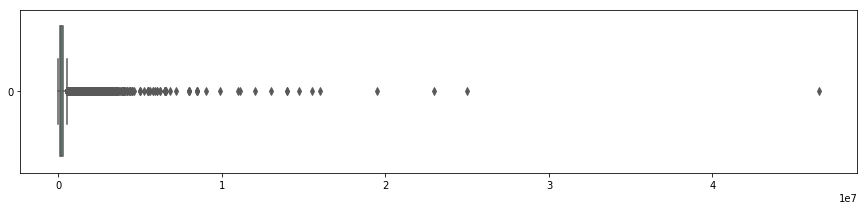

In [197]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df['price_aprox_usd'], orient="h", palette="Set2")

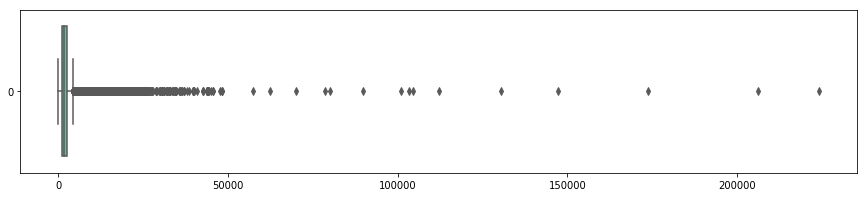

In [198]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df['price_usd_per_m2'], orient="h", palette="Set2")

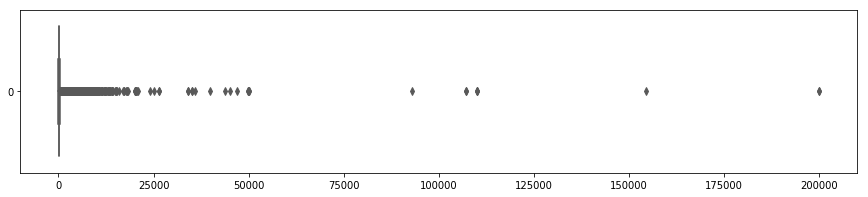

In [200]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df['surface_total_in_m2'], orient="h", palette="Set2")

In [202]:
q95_price_usd = df['price_aprox_usd'].quantile(.99)
q95_price_usd_per_m2 = df['price_usd_per_m2'].quantile(.99)
q95_surface_covered_in_m2 = df['surface_total_in_m2'].quantile(.99)

In [204]:
df = df[df['price_aprox_usd']<= q95_price_usd]
df = df[df['price_usd_per_m2']<= q95_price_usd_per_m2]
df = df[df['surface_total_in_m2']<= q95_surface_covered_in_m2]

In [205]:
df.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,rooms
count,90410.000000,90410.000000,9.041000e+04,90410.000000,90410.000000,57876.000000
mean,-34.535497,-59.164029,2.144106e+05,203.364233,1799.318710,2.883907
std,1.783522,2.131105,2.024733e+05,325.612323,1079.046805,1.531588
min,-54.819736,-72.392144,4.666620e+03,4.000000,6.730040,0.000000
25%,-34.651053,-58.698385,9.000000e+04,51.000000,1112.167797,2.000000
50%,-34.586422,-58.499653,1.450000e+05,88.000000,1696.660656,3.000000
75%,-34.427868,-58.402037,2.600000e+05,210.000000,2341.442389,4.000000
max,-22.648143,68.752605,1.503761e+06,3100.000000,10740.740741,30.000000


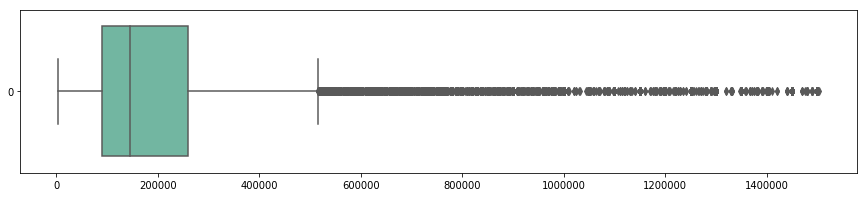

In [206]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df['price_aprox_usd'], orient="h", palette="Set2")

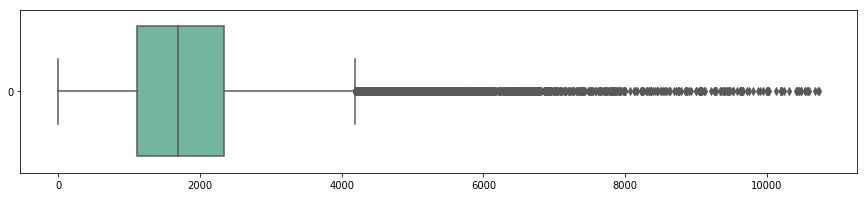

In [207]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df['price_usd_per_m2'], orient="h", palette="Set2")

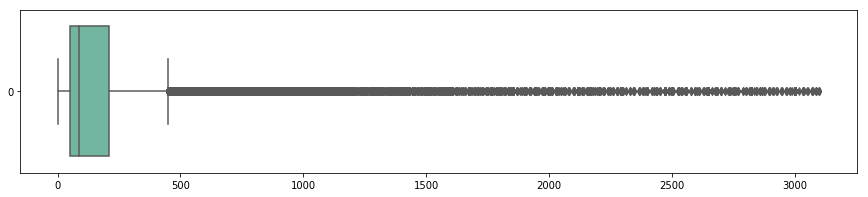

In [208]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df['surface_total_in_m2'], orient="h", palette="Set2")

In [209]:
df.to_csv('properati_vOutlier.csv',index=True,index_label='index',encoding='utf-8')

In [210]:
df = pd.read_csv('properati_vOutlier.csv', index_col='index',encoding='utf-8')
df.head(3)

,operation,property_type,place_with_parent_names,lat,lon,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,rooms
index,,,,,,,,,
0,sell,PH,"Mataderos, Capital Federal, Argentina",-34.661824,-58.508839,62000.0,55.0,1127.272727,2.0
2,sell,apartment,"Mataderos, Capital Federal, Argentina",-34.652262,-58.522982,72000.0,55.0,1309.090909,2.0
4,sell,apartment,"Mar Del Plata, Buenos Aires, Argentina",-38.002626,-57.549447,64000.0,35.0,1828.571429,2.0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section4'></a>

<div style="border-bottom:1px solid #000;"> 
<div align="left"><h2>Step 4: Visualizaciones y Conclusiones finales</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div>
